In [48]:
import numpy as np
import scipy.signal as signal
import torchaudio
from IPython.display import Audio
import torch
from matplotlib import pyplot as plt
import soundfile as sf
import time
import scipy.signal as sig

In [54]:
def standardize_max_abs(signal,out=False):
    max_abs_value = np.max(np.abs(signal))
    standardized_signal = signal / max_abs_value
    if out:
        return standardized_signal, max_abs_value
    else:
        return standardized_signal


signal.shape=(96000,)
48000
signal_rev1.shape=(125888,)
signal_rev1


signal_early1


signal_late1


signal_rev1-signal_early1


signal_rev1-signal_late1


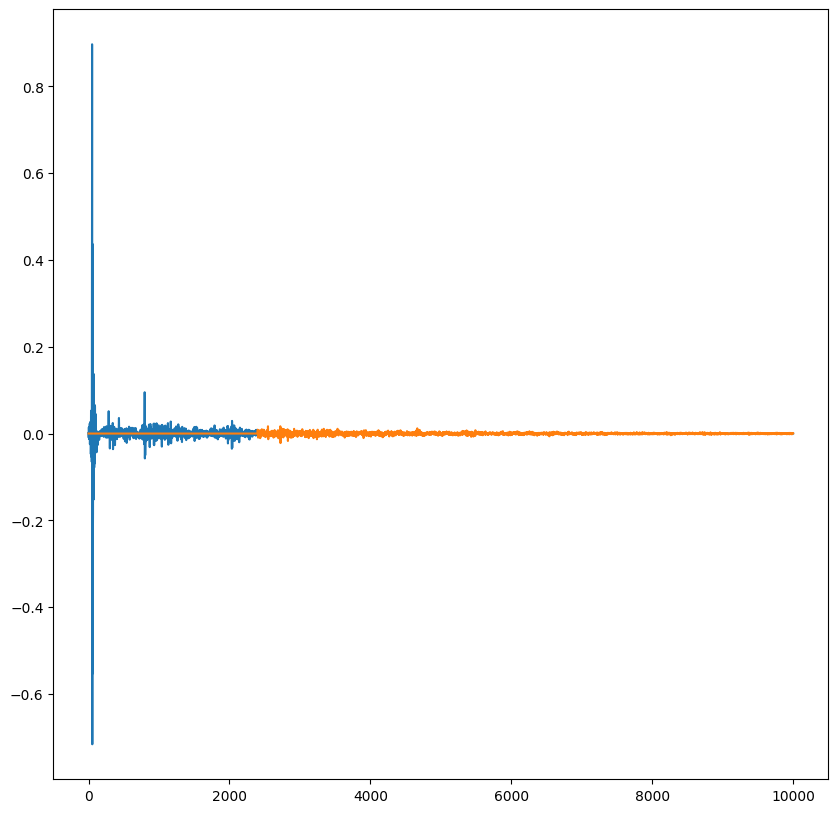

In [50]:
#  Load sample audio signals:

# load audio signal
signal, fs_signal = sf.read('audios/speech_VCTK_4_sentences.wav')
signal = signal[:int(2*fs_signal)]
print(f"{signal.shape=}")
# load room impulse response
rir2, fs_rir2 = sf.read('audios/rir_ACE_lecture_hall.wav')
rir1 = rir2[:int(3*fs_rir2)]
print(fs_rir2)
# resample rir to match desired fs
fs=48000
rir2 = sig.resample_poly(rir2, fs, fs_signal)
signal = sig.resample_poly(signal, fs, fs_rir2)
# divide rir into early reflections and late reverb
rir_early1=np.zeros((rir1.shape))
rir_late1=np.zeros((rir1.shape))
cutoff_point=int(0.05*fs)
rir_early1[:cutoff_point] = rir1[:cutoff_point]
rir_late1[cutoff_point:] = rir1[cutoff_point:]
# convolve
signal_rev1=sig.fftconvolve(signal,rir1, 'full', 0)
signal_early1=sig.fftconvolve(signal,rir_early1, 'full', 0)
signal_late1=sig.fftconvolve(signal,rir_late1, 'full', 0)

print(f"{signal_rev1.shape=}")

plt.figure(figsize=(10,10))
plt.plot(rir_early1[0:10000])
plt.plot(rir_late1[0:10000])
plt.show

audios=[signal_rev1, signal_early1, signal_late1,signal_rev1-signal_early1,signal_rev1-signal_late1]
audios_names=["signal_rev1", "signal_early1", "signal_late1","signal_rev1-signal_early1","signal_rev1-signal_late1"]
for i in range(len(audios)):
    print(audios_names[i])
    display(Audio(audios[i],rate=fs))


signal.shape=(96000,)
48000
signal_rev2.shape=(215999,)
signal_rev2


signal_early2


signal_late2


signal_rev2-signal_early2


signal_rev2-signal_late2


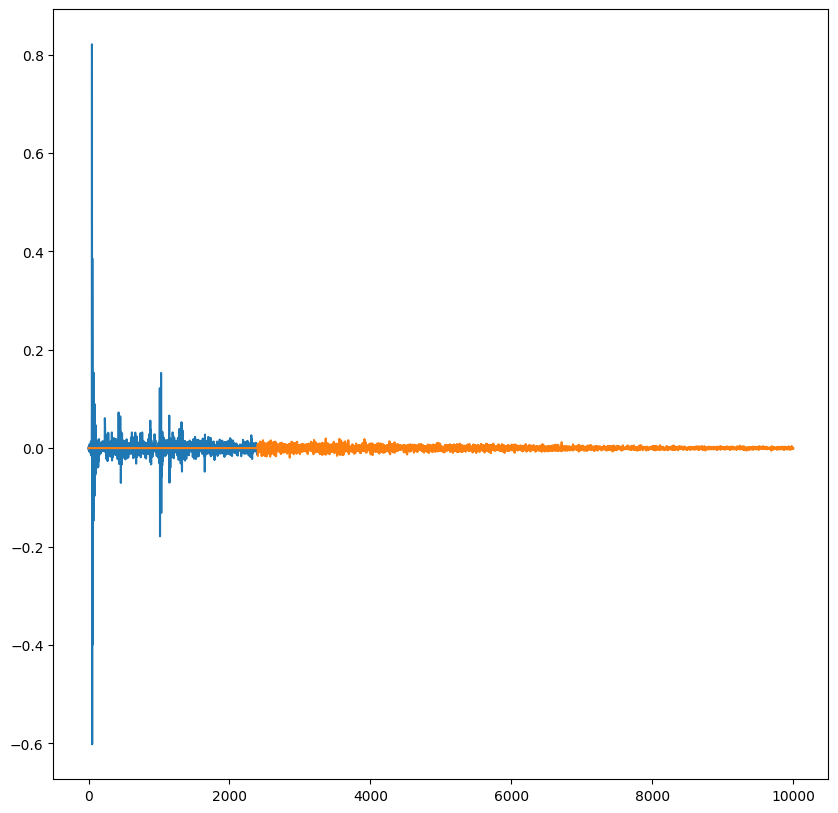

In [51]:
#  Load sample audio signals:

# load audio signal
signal, fs_signal = sf.read('audios/speech_VCTK_4_sentences.wav')
signal = signal[:int(2*fs_signal)]
print(f"{signal.shape=}")
# load room impulse response
rir2, fs_rir2 = sf.read('audios/Single_EE_lobby_1_RIR.wav')
rir2 = rir2[:int(2.5*fs_rir2)]
print(fs_rir2)
# resample rir to match desired fs
fs=48000
rir2 = sig.resample_poly(rir2, fs, fs_signal)
signal = sig.resample_poly(signal, fs, fs_rir2)
# divide rir into early reflections and late reverb
rir_early2=np.zeros((rir2.shape))
rir_late2=np.zeros((rir2.shape))
cutoff_point=int(0.05*fs)
rir_early2[:cutoff_point] = rir2[:cutoff_point]
rir_late2[cutoff_point:] = rir2[cutoff_point:]
# convolve
signal_rev2=sig.fftconvolve(signal,rir2, 'full', 0)
signal_early2=sig.fftconvolve(signal,rir_early2, 'full', 0)
signal_late2=sig.fftconvolve(signal,rir_late2, 'full', 0)

print(f"{signal_rev2.shape=}")

plt.figure(figsize=(10,10))
plt.plot(rir_early2[0:10000])
plt.plot(rir_late2[0:10000])
plt.show

audios=[signal_rev2, signal_early2, signal_late2,signal_rev2-signal_early2,signal_rev2-signal_late2]
audios_names=["signal_rev2", "signal_early2", "signal_late2","signal_rev2-signal_early2","signal_rev2-signal_late2"]
for i in range(len(audios)):
    print(audios_names[i])
    display(Audio(audios[i],rate=fs))

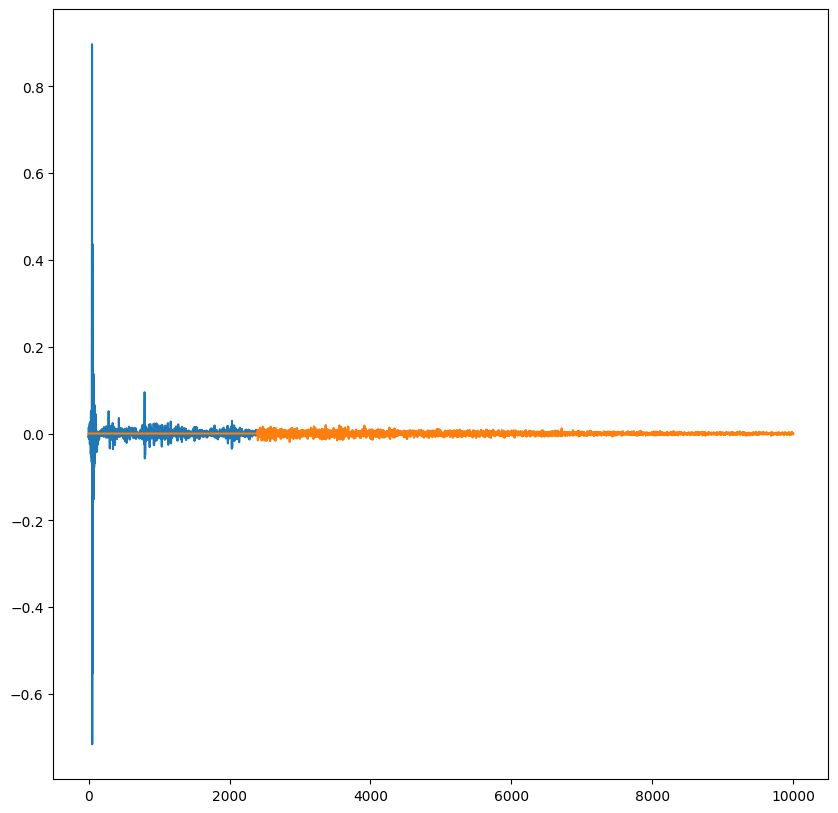

In [52]:
def add_signals(a,b):
# add values of two arrays of different lengths
    if len(a) < len(b):
        c = b.copy()
        c[:len(a)] += a
    else:
        c = a.copy()
        c[:len(b)] += b
    return c

rir_mix=add_signals(rir_early1,rir_late2)
signal_mix=sig.fftconvolve(signal,rir_mix, 'full', 0)

plt.figure(figsize=(10,10))
plt.plot(rir_early1[1:10000])
plt.plot(rir_late2[1:10000])
plt.show

display(Audio(signal_mix,rate=48000))
display(Audio(signal_rev2,rate=48000))



In [53]:
rir_mix=add_signals(rir_early2,rir_late1)
signal_mix=sig.fftconvolve(signal,rir_mix, 'full', 0)

display(Audio(signal_mix,rate=48000))
display(Audio(signal_rev1,rate=48000))


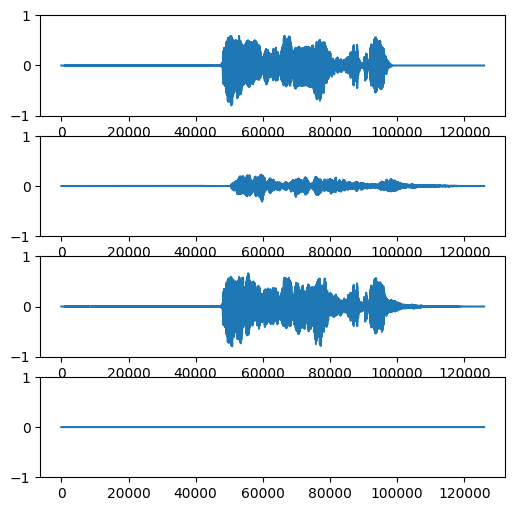

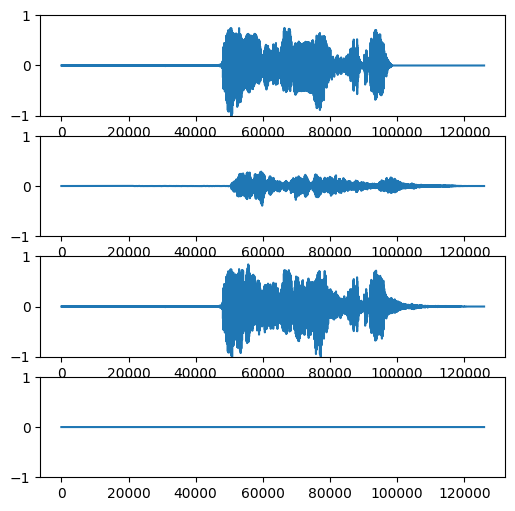

In [55]:
# SCALING PROBLEMS

signal_rev1_sc, sc_max=standardize_max_abs(signal_early1+signal_late1,out=True)
signal_early1_sc=(signal_early1)/sc_max
signal_late1_sc=(signal_late1)/sc_max

plt.figure(figsize=(6,6))
plt.subplot(4,1,1)
plt.plot(signal_early1)
plt.ylim(-1,1)
plt.subplot(4,1,2)
plt.plot(signal_late1)
plt.ylim(-1,1)
plt.subplot(4,1,3)
plt.plot(signal_rev1)
plt.ylim(-1,1)
plt.subplot(4,1,4)
plt.plot(signal_rev1-signal_late1-signal_early1)
plt.ylim(-1,1)
plt.show()

plt.figure(figsize=(6,6))
plt.subplot(4,1,1)
plt.plot(signal_early1_sc)
plt.ylim(-1,1)
plt.subplot(4,1,2)
plt.plot(signal_late1_sc)
plt.ylim(-1,1)
plt.subplot(4,1,3)
plt.plot(signal_rev1_sc)
plt.ylim(-1,1)
plt.subplot(4,1,4)
plt.plot(signal_rev1_sc-signal_late1_sc-signal_early1_sc)
plt.ylim(-1,1)
plt.show()





In [57]:
display(Audio(signal_rev1_sc,rate=48000))

display(Audio(signal_rev1_sc-signal_late1_sc,rate=48000))

display(Audio(signal_rev1_sc-signal_early1_sc,rate=48000))